# Data Wrangling Fundamentals in Python

In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'white',
              'transition': 'none',
              'start_slideshow_at': 'selected',
})

{u'start_slideshow_at': 'selected', u'theme': 'white', u'transition': 'none'}

## Introduction to Data Wrangling

* Loosely defined process for manually converting or mapping data from one raw form into another format. 
* Purpose is to recast the data into a format which 
    * simplifies our processing chain 
    * enables us to use tools which require a certain layout
* Typically one of our first steps


The process of wrangling can involve a broad variety of operations, such as sorting, filtering, or other operations. Many of these are covered elsewhere in our materials, so for the purposes of this chapter, we'll emphasize wrangling operations which involve reshaping data or combining multiple sets of data.

### Initialization of Notebook

In [2]:
# Our standard set of imports for pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# in addition, it will be useful in general if we keep our plots `inline` within the notebook
%matplotlib inline

# finally, let's use a style that's a bit prettier than the default
mpl.style.use('ggplot')

## Reshaping Data

### Wide form versus long form data

* *wide-format* data: 
    * each line in the file contains a column for each variable. 
    * almost certainly what you're most familiar with
* *long-format* data:
    * a column for possible variable types and a column for the values of those variables. 
    * If you're like most people, then that description is probably pretty hard to get a handle on.

Before we get started, let's make sure that we have a copy of our favorite DataFrame, the iris data set and remind ourselves of the layout of the data.

### Wide form versus long form data

In [3]:
# Let's set up a URL to the file, which in this case is hosted on github
base_url = 'https://raw.githubusercontent.com/johnjfox/Analytic_Enterprise/master/data/'
data_url = 'iris/iris.data.csv'
url = base_url + data_url

# Now let's read the file
df = pd.read_csv(url)

# Finally, let's print the first few lines
df.head(5)

,ID,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


As you can see (and probably remember), each row has **all** of the data associated with our measurements for any one of the irises. Now, let's look at what happens if we convert this to long-format. In python, we do this using the `melt()` method.

### Wide form versus long form data

In [4]:
df_melt = pd.melt(df,'ID', var_name='measurement')
df_melt.head(5)

,ID,measurement,value
0,1,Sepal_Length,5.1
1,2,Sepal_Length,4.9
2,3,Sepal_Length,4.7
3,4,Sepal_Length,4.6
4,5,Sepal_Length,5


#### NOTE: this is a better example

The process of *melting* the original DataFrame essentially pulled apart the data and created a new representation. 
* One or more columns are identifier variables (in this case the contents of the `ID` variable). 
* The only other columns are columns containing variable names and values. 
* Each of the values in the table now appears on a separate row,

### Why did we do this? 

We'll often receive data in a format that doesn't lend itself to analysis. This can happen in a lot of ways, for instance:

* Column headers are values, not variable names.
* Multiple variables are stored in one column.
* Variables are stored in both rows and columns.
* Multiple types of observational units are stored in the same table.   
* A single observational unit is stored in multiple tables.

Melting the data is often the first step in reshaping the data into a format that is more amenable to analysis. Either we'll melt the data as an end unto itself, or we might use some of the other pandas operations (e.g. pivot or groupby) to reshape into a different form.

### When should I use the various formats of data?

* Most of the analyses that we've seen to this point work quite well with wide-format data. 
* Wide-format data is convenient since we have methods that allow us to extract single variables. For instance:

In [5]:
print "\n\nMEAN = ", df.Petal_Width.describe()



MEAN =  count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: Petal_Width, dtype: float64


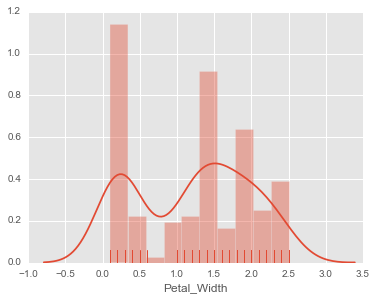

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,4.5))

sns.distplot(df.Petal_Width, rug=True, bins=10);

Similarly, having columns representing distinct variables, all of which are taken from the same observation, makes it very easy to compare or manipulate those variables. For instance, we can easily create a scatter plot or measure the correlation of the variables:

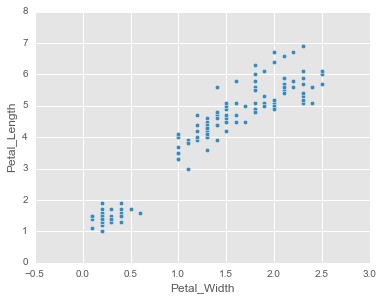

In [7]:
df.plot.scatter('Petal_Width', 'Petal_Length', figsize=(6,4.5));

In [8]:
# the pairwise correlation of each variable in the table
df.corr()

,ID,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
ID,1.000000,0.716676,-0.397729,0.882747,0.899759
Sepal_Length,0.716676,1.000000,-0.109369,0.871754,0.817954
Sepal_Width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
Petal_Length,0.882747,0.871754,-0.420516,1.000000,0.962757
Petal_Width,0.899759,0.817954,-0.356544,0.962757,1.000000


On the other hand, notice one thing that happened as a result of the `melt()`: 
* The variable names are now being treated as categorical variables in the new DataFrame. 
* This can be exceptionally useful for exploratory analysis where we'd like to get a holistic view of all of the data in a single plot. For instance, consider a stripplot of all of the iris data as shown below;

In [4]:
df_melt = pd.melt(df,'ID', var_name='measurement')
df_melt.head(5)

,ID,measurement,value
0,1,Sepal_Length,5.1
1,2,Sepal_Length,4.9
2,3,Sepal_Length,4.7
3,4,Sepal_Length,4.6
4,5,Sepal_Length,5


Long-format data isnt necessarily only two columns. For example, we might have ozone measurements for each day of the year. In that case, we could have another column for day. In other words, there are different levels of longness. The ultimate shape you want to get your data into will depend on what you are doing with it.

It turns out that you need wide-format data for some types of data analysis and long-format data for others. In reality, you need long-format data much more commonly than wide-format data.

* The process of melting the iris data has ended up with a DataFrame where we can use the original variable names to partition the measurements. 
* By using the categorical identifier variable (`Class`) to determine the hue of each datapoint, we can easily see that the Petal_Length and Petal_Width are separable for one of the classes of irises.

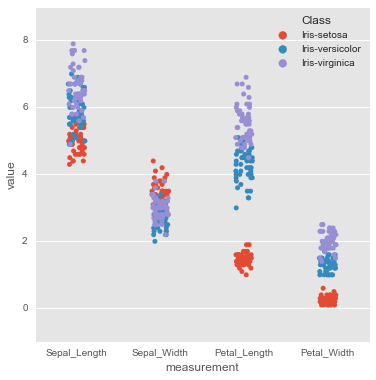

In [9]:
plt.figure(figsize=(6,6))
df = df.drop(['ID'], axis=1)
df_melt = pd.melt(df,'Class', var_name='measurement')

sns.stripplot(y='value', x='measurement', hue='Class', data=df_melt, jitter= True);

### Going From Long Form to Wide Form: <br/>Pivot Tables

* There are multiple approaches for transforming long data into wide data, a.k.a. undoing a `melt`. 
* The one which will be most familiar to Excel users is to create a pivot table.
* The one I find easiest to remember is the `pivot_table()` function, which has the following form.

In [10]:
pd.pivot_table(df_melt,values = 'value', index='Class', columns='measurement', aggfunc = 'mean')

measurement,Petal_Length,Petal_Width,Sepal_Length,Sepal_Width
Class,,,,
Iris-setosa,1.464,0.244,5.006,3.418
Iris-versicolor,4.260,1.326,5.936,2.770
Iris-virginica,5.552,2.026,6.588,2.974


An important thing to note is that the final argument `aggfunc` can take a list of functions. The functions which are available to it all come from the numpy package. A partial list of these functions (assuming that we import numpy as `np` is:

|Function | Description | 
|:-------:|:-----------|
| `min` | The minimum of the aggregated data |
| `max` | The maximum of the aggregated data |
| `mean` | The average of the aggregated data |
| `std` | The standard deviation of the aggregated data |
| `count` | The count of the aggregated data |


## Data Merging

Let's recall the contents of our original wide-format DataFrame:

In [11]:
df.head(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now, what if we wanted to merge this data with some other data set, say a table that contained the prices for each class of iris. You could imagine that such a table might look like the following (although we wouldn't be generating the data randomly):

In [12]:
# some random price data
data = {'Class' : ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'iris-fakosa'],
        'price' : np.random.uniform(0,10,4)}
price_df = pd.DataFrame(data, columns=['Class', 'price'])
price_df

,Class,price
0,Iris-setosa,4.323986
1,Iris-versicolor,7.583153
2,Iris-virginica,2.071269
3,iris-fakosa,0.648936


As an aside, the `np.random.uniform(0,10,4)` is a function call generates a list containing 4 samples of a uniformly distributed random number between 0 and 10, inclusive.

### Merging Via a Join

Users of relational databases will be familiar with the terminology used to describe join operations between two table like structures, in our case DataFrame objects. There are several cases to consider which are very important to understand:

* one-to-one joins: for example when joining two DataFrame objects on their indexes (which must contain unique values)
* many-to-one joins: for example when joining an index (unique) to one or more columns in a DataFrame
* many-to-many joins: joining columns on columns.

The most general purpose method for performing this is the `merge()` operator, which supports the following types of operations

| merge method | SQL Join Name | Description | 
| :---: | :--- | :--- |
| left	| LEFT OUTER JOIN | 	Use keys from left frame only |
| right	| RIGHT OUTER JOIN | Use keys from right frame only | 
| outer	| FULL OUTER JOIN | Use union of keys from both frames | 
| inner	| INNER JOIN | Use intersection of keys from both frames |

![SQL Joins](../images/sql-joins.png)

### Let's Take a Sample of Our Iris Data

In [13]:
# let's start by taking a random sample of the iris data so we can see a bit of diversity in the 'Class' variable
random_df = df.sample(n=5)
random_df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
71,6.1,2.8,4.0,1.3,Iris-versicolor
105,7.6,3.0,6.6,2.1,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
46,5.1,3.8,1.6,0.2,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


Now, using this sample of the data, let's join the price data to each row using the Class variable.

In [14]:
pd.merge(random_df, price_df, how='inner', on='Class').head(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class,price
0,6.1,2.8,4.0,1.3,Iris-versicolor,7.583153
1,7.6,3.0,6.6,2.1,Iris-virginica,2.071269
2,6.4,3.1,5.5,1.8,Iris-virginica,2.071269
3,5.1,3.8,1.6,0.2,Iris-setosa,4.323986
4,5.0,3.4,1.5,0.2,Iris-setosa,4.323986


### Concatenating Additional Samples

Another very common way of combining datasets comes up when we obtain additional observations, or rows, which we want to append onto our existing dataset. To start, let's create a random set of observations.

### Let's create some data to play with

Notice that our new data includes a new variable called `Petal_Color` but does not include `Sepal_Length`

In [15]:
# sample randomly generated samples of our new class of iris
data = {'Class' : ['Iris-fakosa'] * 5,
        'ID': range(200,205),
        'Sepal_Length' : np.random.uniform(0,10,5),
        'Sepal_Width' : np.random.uniform(0,10,5),
        'Petal_Length' : np.random.uniform(0,10,5),
        'Petal_Width' : np.random.uniform(0,10,5),
        'Petal_Color' : ['purple', 'green', 'red', 'yellow', 'yellow']}

more_samples_df = pd.DataFrame(data,columns=['Class',
                                             'ID',
                                            'Sepal_Width',
                                            'Petal_Length',
                                            'Petal_Width',
                                            'Petal_Color'])

### Our sample data

In [16]:
more_samples_df

,Class,ID,Sepal_Width,Petal_Length,Petal_Width,Petal_Color
0,Iris-fakosa,200,7.819383,5.960584,8.637084,purple
1,Iris-fakosa,201,3.493760,9.078293,1.501959,green
2,Iris-fakosa,202,5.798148,4.104692,2.998682,red
3,Iris-fakosa,203,7.204292,8.398338,1.803964,yellow
4,Iris-fakosa,204,3.301205,8.817860,6.129410,yellow


### Let's append the new data to the original data.

In [17]:
random_df.append(more_samples_df).tail(10)

,Class,ID,Petal_Color,Petal_Length,Petal_Width,Sepal_Length,Sepal_Width
71,Iris-versicolor,NaN,NaN,4.000000,1.300000,6.1,2.800000
105,Iris-virginica,NaN,NaN,6.600000,2.100000,7.6,3.000000
137,Iris-virginica,NaN,NaN,5.500000,1.800000,6.4,3.100000
46,Iris-setosa,NaN,NaN,1.600000,0.200000,5.1,3.800000
7,Iris-setosa,NaN,NaN,1.500000,0.200000,5.0,3.400000
0,Iris-fakosa,200,purple,5.960584,8.637084,NaN,7.819383
1,Iris-fakosa,201,green,9.078293,1.501959,NaN,3.493760
2,Iris-fakosa,202,red,4.104692,2.998682,NaN,5.798148
3,Iris-fakosa,203,yellow,8.398338,1.803964,NaN,7.204292
4,Iris-fakosa,204,yellow,8.817860,6.129410,NaN,3.301205


As you can see, the `append()` was smart! It recognized the observations did not all include the same variables and left room appropriately in the table to represent that there was missing data. Furthermore, it used the NaN to represent the missing data so that any subsequent functions would recognize that the data was missing.